In [6]:
import pandas as pd
print(pd.__version__)
df = pd.read_csv("../data/flipkart.csv")
df.head()
df.shape
df.info()



2.3.0+4.g1dfc98e16a
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20002 entries, 0 to 20001
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  object 
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  pr

In [7]:
df.isnull().sum()

uniq_id                       2
crawl_timestamp               2
product_url                   2
product_name                  2
product_category_tree         2
pid                           2
retail_price                 80
discounted_price             80
image                         5
is_FK_Advantage_product       2
description                   4
product_rating                2
overall_rating                2
brand                      5866
product_specifications       16
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)


In [9]:
df=df.dropna(subset=['retail_price','discounted_price'])

In [10]:
df['brand']=df['brand'].fillna("Unknown")

In [11]:
df['image']=df['image'].fillna('No Image')
df['description']=df['description'].fillna('No description available')
df['product_specifications']=df['product_specifications'].fillna('Not specified')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19922 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  19922 non-null  object 
 1   crawl_timestamp          19922 non-null  object 
 2   product_url              19922 non-null  object 
 3   product_name             19922 non-null  object 
 4   product_category_tree    19922 non-null  object 
 5   pid                      19922 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19922 non-null  object 
 9   is_FK_Advantage_product  19922 non-null  object 
 10  description              19922 non-null  object 
 11  product_rating           19922 non-null  object 
 12  overall_rating           19922 non-null  object 
 13  brand                    19922 non-null  object 
 14  product_specifications   19

In [13]:
df['main category']=df['product_category_tree'].str.split('>>').str[0].str.replace('[\[\]\']','')
df=df.drop('main category',axis=1)

In [14]:
df['discount_percent']=(df['retail_price']-df['discounted_price'])*100/df['retail_price']

In [15]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,discount_percent
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",62.062062
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",29.576764
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",50.050050
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",61.802575
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",4.545455


In [16]:
df['main_category'] = df['product_category_tree'].str.split('>>').str[0].str.replace('[\[\]\']','',regex=True)


In [17]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,discount_percent,main_category
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",62.062062,"""Clothing"
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",29.576764,"""Furniture"
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",50.050050,"""Footwear"
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",61.802575,"""Clothing"
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",4.545455,"""Pet Supplies"


In [18]:
import ast 
def clean_spec(x):
    try:

        x=x.replace('=>',':')
        data=ast.literal_eval(x)
        spec=data.get('product_specification',[])
        return ",".join([f"{item.get('key')}:{item.get('value')}" for item in spec])
    except:
        return "Not specified"
df['clean_spec']=df['product_specifications'].apply(clean_spec)



In [19]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,discount_percent,main_category,clean_spec
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",62.062062,"""Clothing","Number of Contents in Sales Package:Pack of 3,..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",29.576764,"""Furniture",Installation & Demo Details:Installation and d...
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",50.050050,"""Footwear","Ideal For:Women,Occasion:Casual,Color:Red,Oute..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",61.802575,"""Clothing","Number of Contents in Sales Package:Pack of 2,..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",4.545455,"""Pet Supplies","Pet Type:Dog,Brand:Sicons,Quantity:500 ml,Mode..."


In [20]:
df['main_category']=df['main_category'].str.replace('"','').str.strip()

In [21]:
df['sub_categgory']=df['product_category_tree'].str.split('>>').str[1].str.replace("[\[\]\']",'',regex=True).str.strip()
df['leaf_categgory']=df['product_category_tree'].str.split('>>').str[2].str.replace("[\[\]\']",'',regex=True).str.strip()


In [22]:
df.groupby('main_category')['retail_price'].mean().sort_values(ascending=False)

df.groupby('main_category')['discount_percent'].mean().sort_values(ascending=False)

df['main_category'].value_counts()



main_category
Clothing                                               6171
Jewellery                                              3522
Footwear                                               1225
Mobiles & Accessories                                  1097
Automotive                                             1010
                                                       ... 
Speedwav 216552 Manual Rear View Mirror (Right, ...       1
Speedwav 216510 Manual Rear View Mirror (Right, ...       1
Speedwav 216456 Manual Rear View Mirror (Right, ...       1
Planet Waves Woodstock Strap (Multicolor)                 1
Areon Luxurious Fragrance Long Lasting Car,Home,...       1
Name: count, Length: 262, dtype: int64

In [23]:
df.nlargest(10,'retail_price')[['product_name','brand','main_category','retail_price']]

,product_name,brand,main_category,retail_price
116,Breitling AB011010/BB08 131S Chronomat 44 Anal...,Unknown,Watches,571230.0
11631,Durian Leather 2 Seater Sofa,Durian,Furniture,250500.0
11507,Durian Laze/3 Leather 3 Seater Sofa,Durian,Furniture,217500.0
11464,Durian Leather 2 Seater Sofa,Durian,Furniture,204600.0
134,"Cartier W6701005 Analog Watch - For Boys, Men",Unknown,Watches,201000.0
11327,Durian Club/3 Leather 3 Seater Sofa,Durian,Furniture,162000.0
7915,"Audeze Lcd2 In Bamboo, High Quality Planar Mag...",Audeze,Mobiles & Accessories,116292.0
11576,Durian Helena Fabric 3 Seater Sofa,Durian,Furniture,108900.0
11702,Durian Helena Fabric 3 Seater Sofa,Durian,Furniture,108900.0
11142,Durian Dream/2 Leather 2 Seater Sofa,Durian,Furniture,108000.0


In [24]:
df.nlargest(10,'discount_percent')[['product_name','brand','main_category','discount_percent']]

,product_name,brand,main_category,discount_percent
17205,Rajcrafts Floral Double Quilts & Comforters White,Rajcrafts,Home Furnishing,96.533333
7284,FashBlush Forever New Orange Bead & Chain Allo...,FashBlush,Jewellery,95.273818
6566,FashBlush Forever Beautiful White Bead Alloy N...,FashBlush,Jewellery,94.598457
10941,Bling Book Case for iPad 2 / 3,Bling,Mobiles & Accessories,94.548458
6368,FashBlush Forever New BlackBead & LongChain Al...,FashBlush,Jewellery,94.418884
7156,Fashblush Alloy Choker,Fashblush,Jewellery,93.576350
5535,Fash Blush Forever New Gold & White Pearl Chun...,Fash Blush,Jewellery,93.364455
6080,FashBlush Forever New BlackBead Alloy Necklace,FashBlush,Jewellery,93.364455
16195,Mydress Mystyle Bulb Led USB Led Light,Mydress Mystyle,Computers,92.492492
5886,Fash Blush Forever New Red & Gold Tribal Threa...,Fash Blush,Jewellery,92.076831


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

In [28]:
df.columns
df.shape

(19922, 20)

In [26]:
import ast

def extract_main_category(x):
    # Case 1: If x contains >>, then we extract properly
    if ">>" in x:
        try:
            lst = ast.literal_eval(x)   # convert "['  ']" into list
            text = lst[0]
            return text.split(">>")[0].strip()
        except:
            text = x
            return text.split(">>")[0].strip()
    
    # Case 2: If x does NOT contain >> (means corrupted row)
    else:
        return "Other"   # fallback
    
df['main_category'] = df['product_category_tree'].astype(str).apply(extract_main_category)


In [29]:
df['main_category'].unique()

array(['Clothing', 'Furniture', 'Footwear', 'Pet Supplies', 'Other',
       'Pens & Stationery', 'Sports & Fitness',
       'Beauty and Personal Care', 'Bags, Wallets & Belts',
       'Home Decor & Festive Needs', 'Automotive', 'Tools & Hardware',
       'Home Furnishing', 'Baby Care', 'Mobiles & Accessories',
       'Food & Nutrition', 'Watches', 'Toys & School Supplies',
       'Jewellery', 'Kitchen & Dining', 'Home & Kitchen', 'Computers',
       'Cameras & Accessories', 'Health & Personal Care Appliances',
       'Gaming', 'Home Improvement', 'Automation & Robotics',
       'Sunglasses', 'Home Entertainment', 'Wearable Smart Devices',
       'Eyewear', 'eBooks', 'Household Supplies'], dtype=object)

In [32]:
df.to_csv("../data/flipkart_cleaned.csv", index=False)


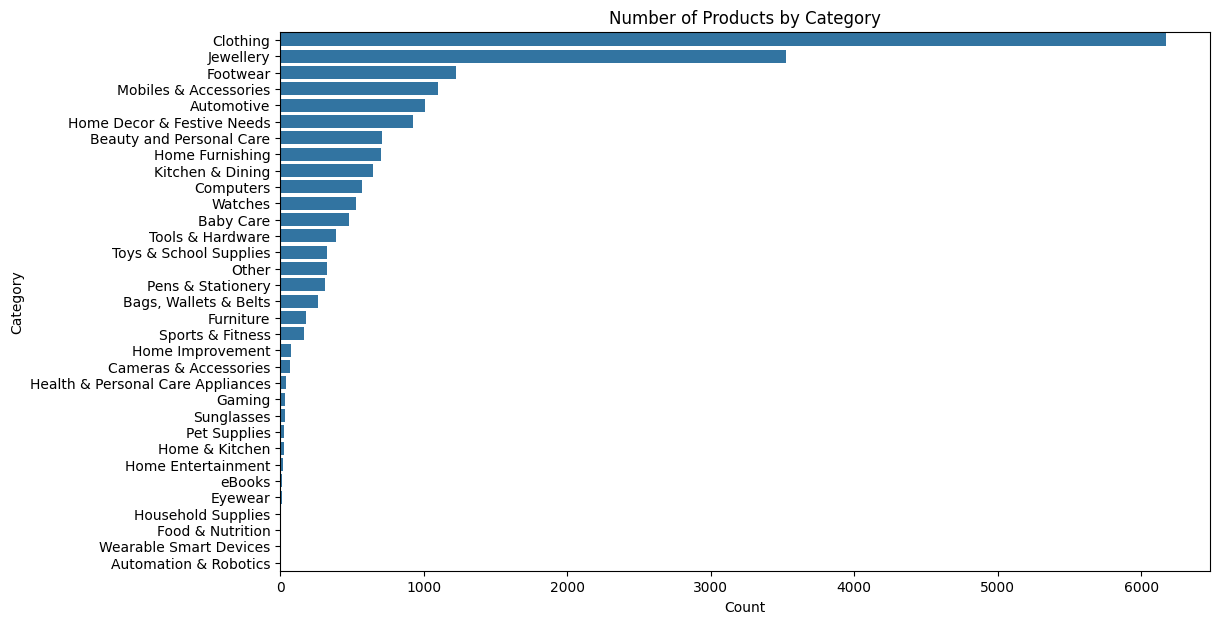

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,7))
sns.countplot(y=df['main_category'], order=df['main_category'].value_counts().index)

plt.title("Number of Products by Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.savefig('../visuals/product_count.png',dpi=300,bbox_inches='tight')

plt.show()


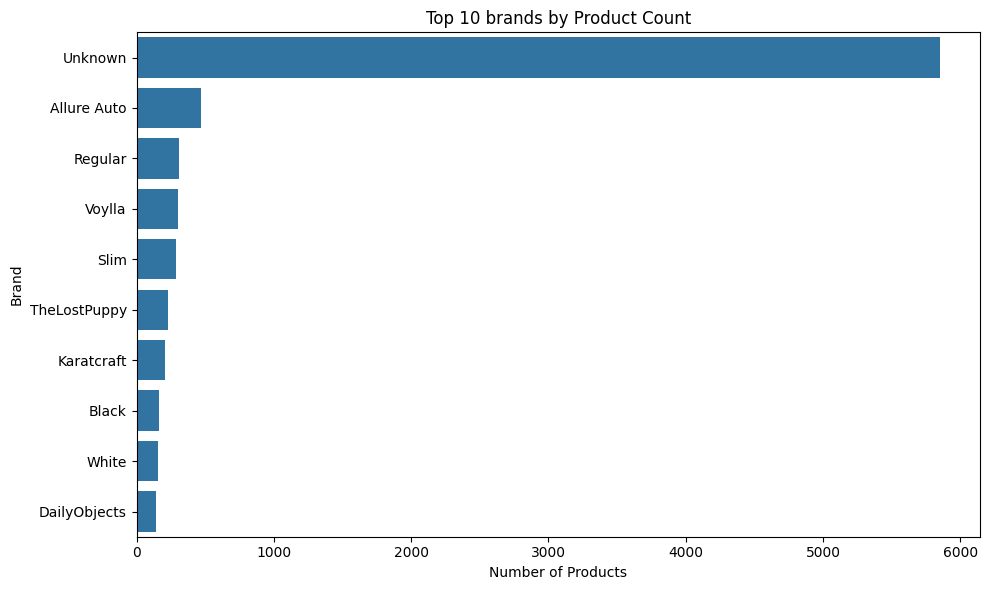

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(10,6))
brand_count=df['brand'].value_counts().head(10)
sns.barplot(x=brand_count.values,y=brand_count.index)
plt.title('Top 10 brands by Product Count')
plt.xlabel('Number of Products')
plt.ylabel('Brand')
plt.tight_layout()
plt.savefig('../visuals/top_brands_count.png',dpi=300,bbox_inches='tight')
plt.show()

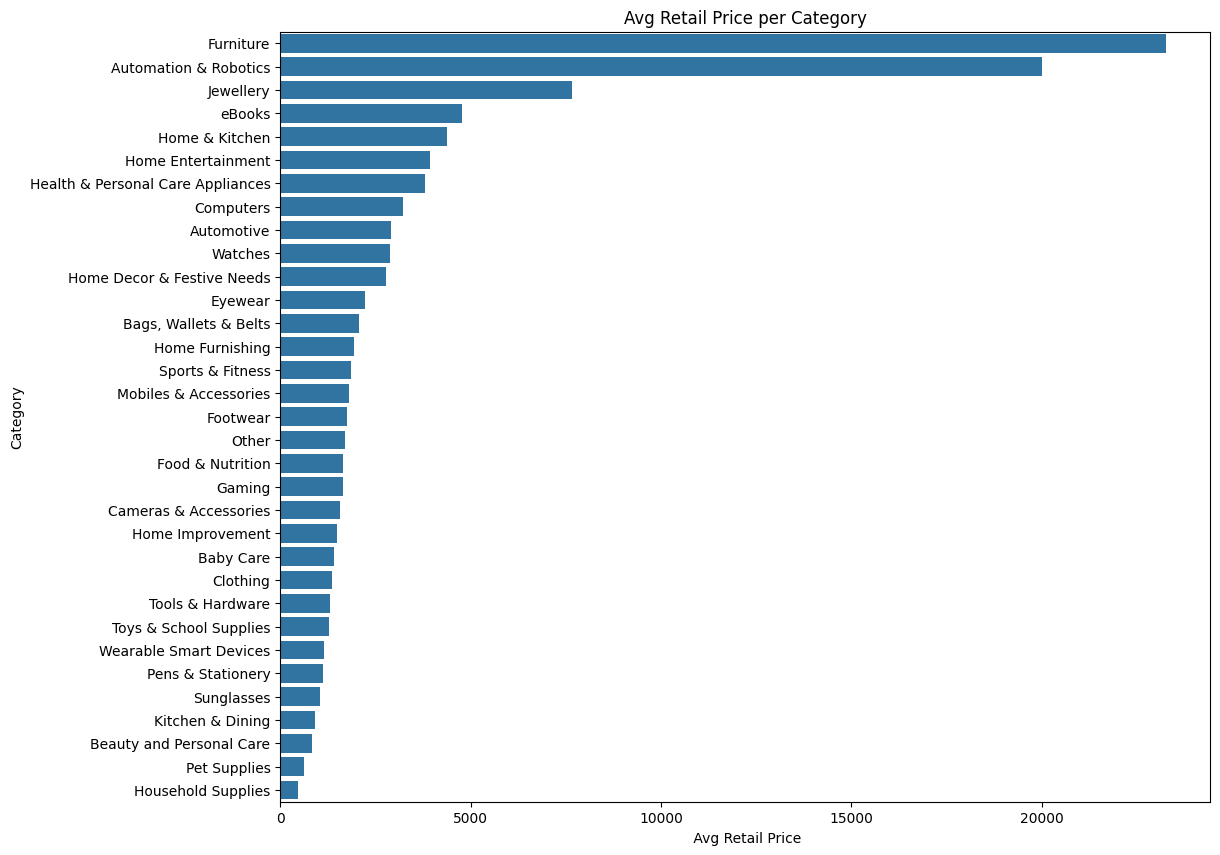

In [36]:
plt.figure(figsize=(12,10))
avg_price=df.groupby('main_category')['retail_price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price.values,y=avg_price.index)
plt.title('Avg Retail Price per Category')
plt.xlabel(' Avg Retail Price')
plt.ylabel('Category')
plt.savefig('../visuals/avg_price_category.png',dpi=300,bbox_inches='tight')
plt.show()

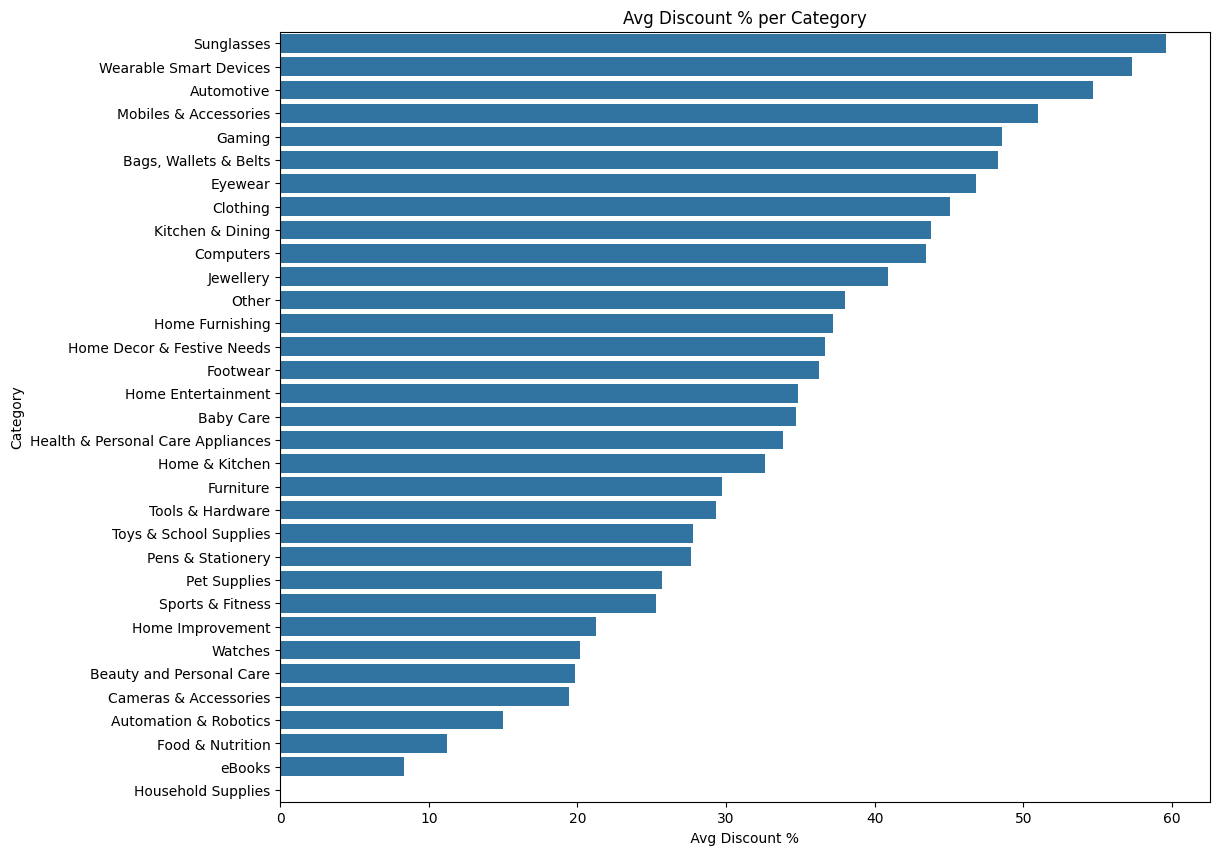

In [37]:
avg_discount_percent=df.groupby('main_category')['discount_percent'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,10))
sns.barplot(x=avg_discount_percent.values,y=avg_discount_percent.index)
plt.title('Avg Discount % per Category')
plt.xlabel(' Avg Discount % ')
plt.ylabel('Category')
plt.savefig('../visuals/avg_discount_category.png',dpi=300,bbox_inches='tight')
plt.show()

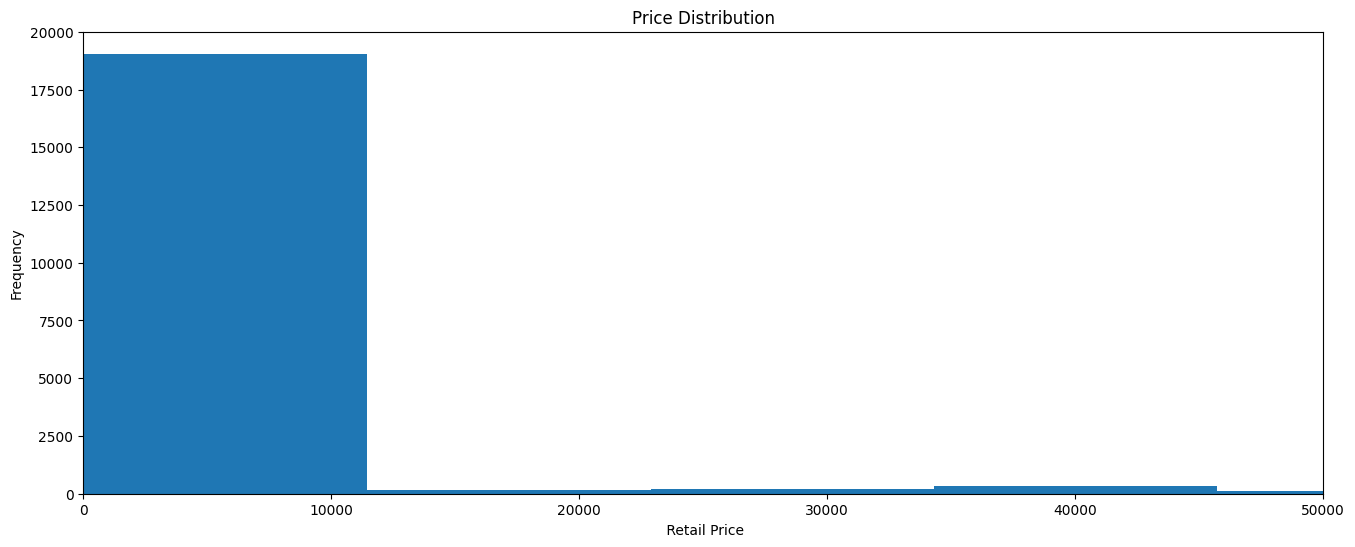

In [38]:
plt.figure(figsize=(16,6))
plt.hist(df['retail_price'],bins=50)
plt.xlim(0,50000)
plt.title('Price Distribution')
plt.xlabel(' Retail Price')
plt.ylabel('Frequency')
plt.savefig('../visuals/price_distribution.png',dpi=300,bbox_inches='tight')
plt.show()

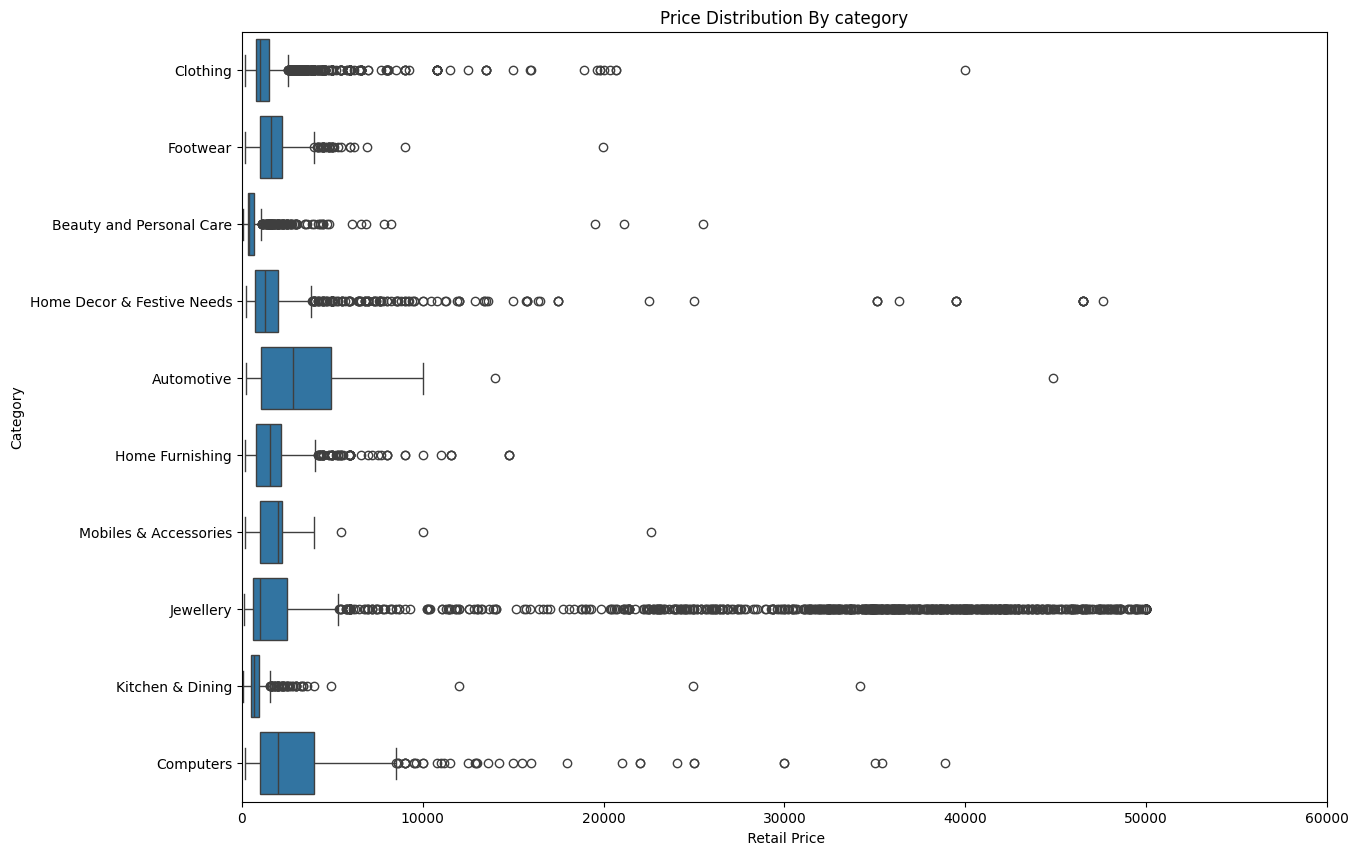

In [39]:
top_categories=df['main_category'].value_counts().head(10).index
filtered_df=df[df['main_category'].isin(top_categories)]
plt.figure(figsize=(14,10))
sns.boxplot(y='main_category',x='retail_price',data=filtered_df)
plt.xlim(0,60000)
plt.title('Price Distribution By category')
plt.xlabel(' Retail Price')
plt.ylabel('Category')
plt.savefig('../visuals/price_distribution_category.png',dpi=300,bbox_inches='tight')
plt.show()


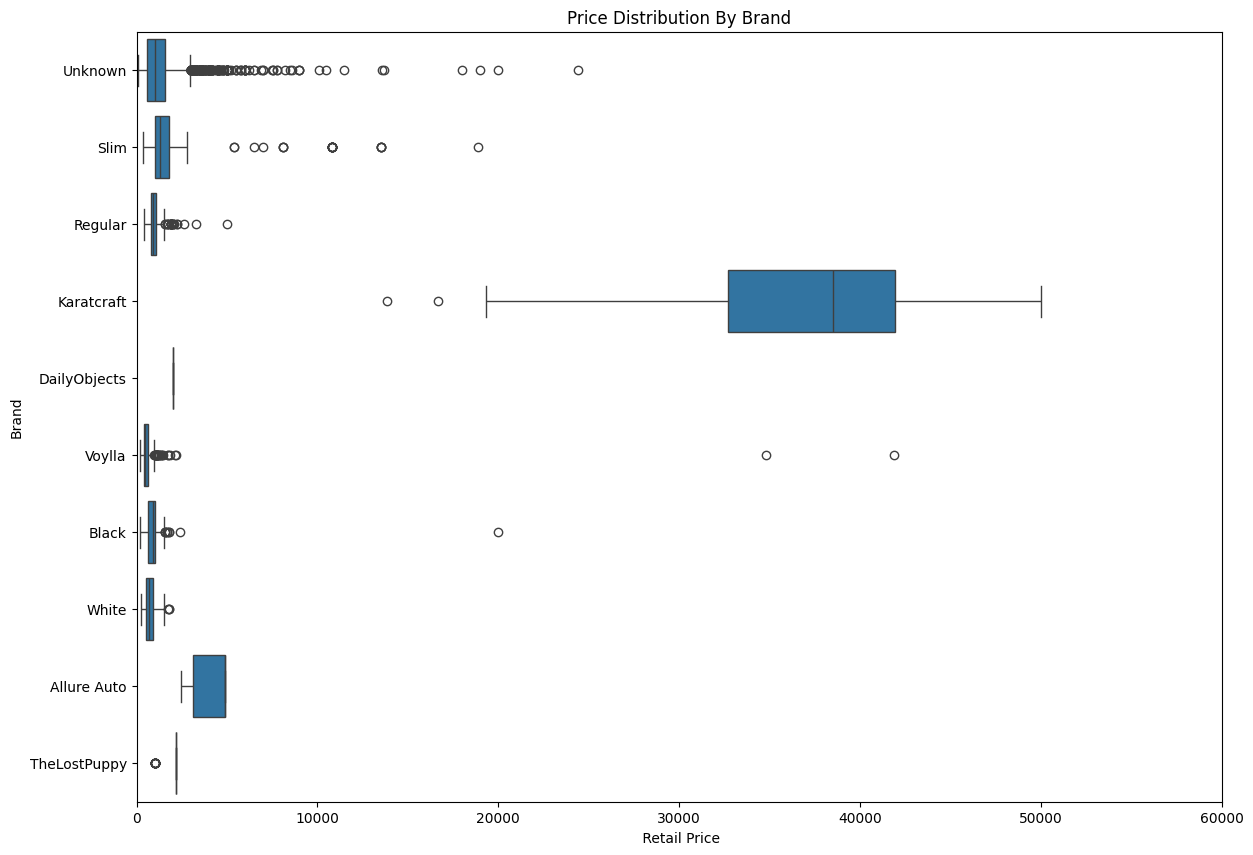

In [40]:
top_brand=df['brand'].value_counts().head(10).index
filtered_brand=df[df['brand'].isin(top_brand)]
plt.figure(figsize=(14,10))
sns.boxplot(y='brand',x='retail_price',data=filtered_brand)
plt.xlim(0,60000)
plt.title('Price Distribution By Brand')
plt.xlabel(' Retail Price')
plt.ylabel('Brand')
plt.savefig('../visuals/price_distribution_brand.png',dpi=300,bbox_inches='tight')
plt.show()

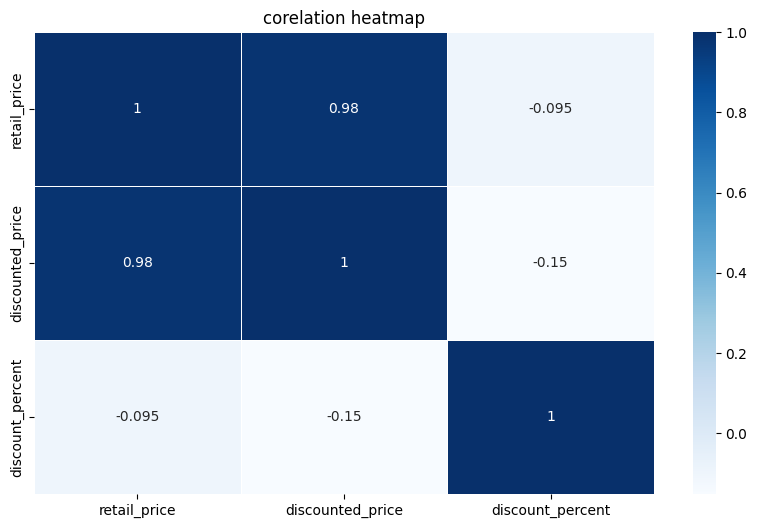

In [41]:
numeric_df=df[['retail_price','discounted_price','discount_percent']]
corr=numeric_df.corr()
corr
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='Blues',linewidth=0.7)
plt.title('corelation heatmap')
plt.savefig('../visuals/heatmap.png',dpi=300,bbox_inches='tight')
plt.show()

In [43]:
import os
os.path.getsize("../data/flipkart_cleaned.csv")/1024/1024


43.17036247253418

In [3]:
import pandas as pd
df=pd.read_csv('../data/flipkart_cleaned.csv')
df.head()


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,discount_percent,main_category,clean_spec,sub_categgory,leaf_categgory
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",62.062062,Clothing,"Number of Contents in Sales Package:Pack of 3,...",Womens Clothing,"Lingerie, Sleep & Swimwear"
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",29.576764,Furniture,Installation & Demo Details:Installation and d...,Living Room Furniture,Sofa Beds & Futons
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",50.050050,Footwear,"Ideal For:Women,Occasion:Casual,Color:Red,Oute...",Womens Footwear,Ballerinas
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",61.802575,Clothing,"Number of Contents in Sales Package:Pack of 2,...",Womens Clothing,"Lingerie, Sleep & Swimwear"
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",4.545455,Pet Supplies,"Pet Type:Dog,Brand:Sicons,Quantity:500 ml,Mode...",Grooming,Skin & Coat Care
